## 1）忽略警告的用法
#import warnings
#warnings.filterwarnings('ignore')

## 2）内嵌绘图忽略plt.show()--------%matplotlib inline

## 3)数据清洗三大块：缺失值，异常值，分类变量

## 4）sns.distplot

## 5）sns.boxplot绘制盒子图，可以不用for语句，需要一个分类变量不同值和连续变量的关系

## 6）sns.heatmap绘制相关性热度图，

## 7）pd的找出最大的几个数corrmat.nlargest(k, 键)

## 8）sns，pairplot

## 9)count() 方法用于统计字符串里某个字符出现的次数,df_train.isnull()已经是被false和true替代的df如果不加isnull会忽略missingdata

## 10)查询是否存在空值df_train.isnull().sum().max()

## 11)np.newaxis分别是在行或列上增加维度

## 12）argsort():x中的元素从小到大排列，提取其对应的index(索引)，然后输出到y

## 13）stats.probplot绘制正态概率图

## 14）sns.residplot绘制残差图

## 15）pd.skew()偏度，pd.kurt()峰度

## 16）分类变量快速dummy：df_train = pd.get_dummies(df_train)

In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
#1）忽略警告的用法
#import warnings
#warnings.filterwarnings('ignore')
%matplotlib inline
#2）内嵌绘图忽略plt.show()--------%matplotlib inline
#3)数据清洗三大块：缺失值，异常值，分类变量

In [2]:
#1. So... What can we expect?



In [3]:

df_train = pd.read_csv('C:/Users/Administrator/Scikit_learn/HOUSEPRICE/train.csv')
df_train.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
##2. First things first: analysing 'SalePrice'



In [1]:
plt.figure(figsize=(10,8))
df_train['SalePrice'].describe()
sns.distplot(df_train['SalePrice'],color='g');
#4）sns.distplot

NameError: name 'plt' is not defined

In [6]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

#15）pd.skew()偏度，pd.kurt()峰度

Skewness: 1.882876
Kurtosis: 6.536282


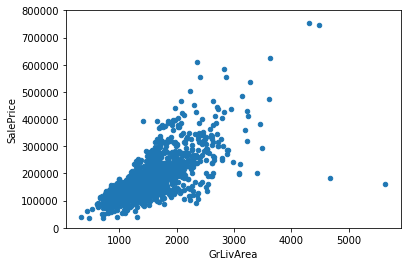

In [7]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

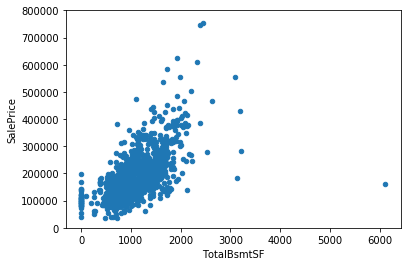

In [8]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

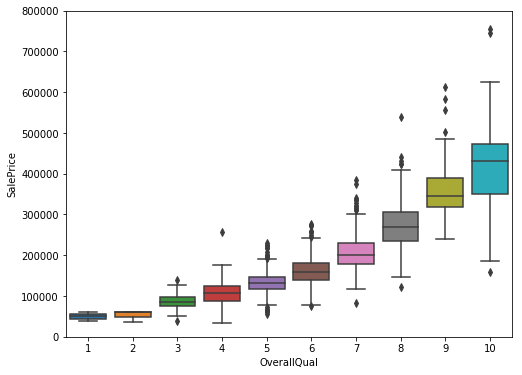

In [9]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
#5）sns.boxplot绘制盒子图，可以不用for语句，需要一个分类变量不同值和连续变量的关系


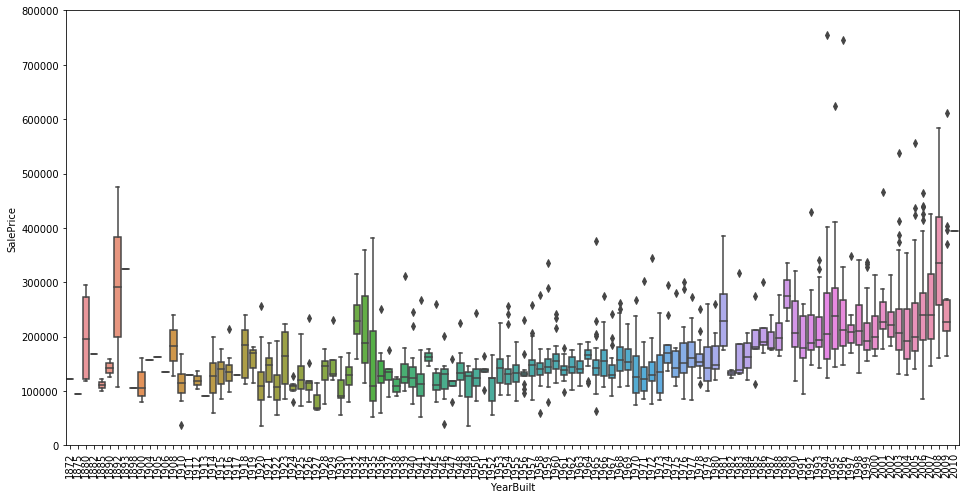

In [10]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [11]:
#3. Keep calm and work smart



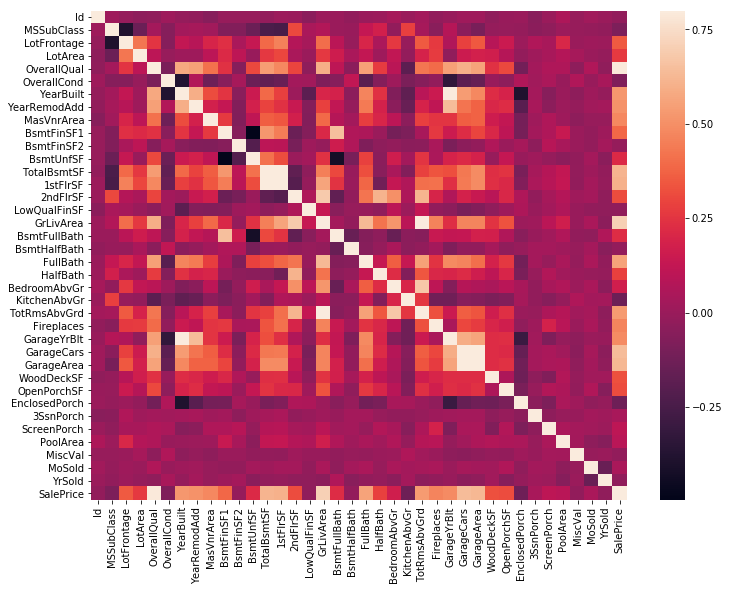

In [12]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=False);
#6）sns.heatmap绘制相关性热度图，

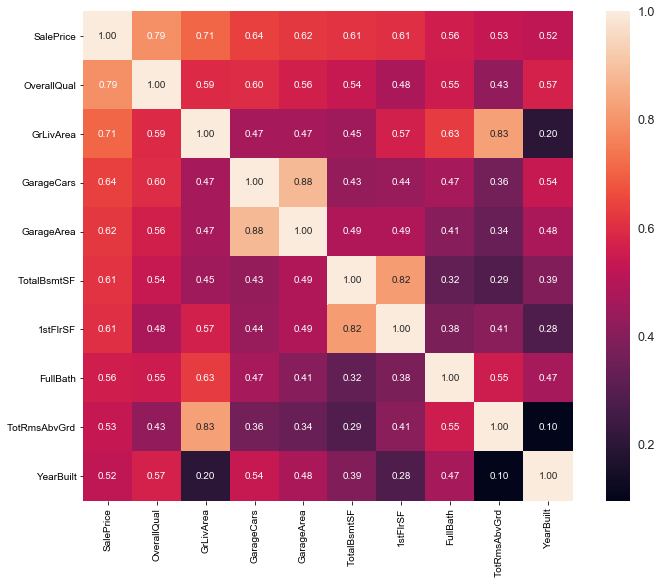

In [13]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
f, ax = plt.subplots(figsize=(12, 9))
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
#7）pd的找出最大的几个数orrmat.nlargest(k, 键)
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

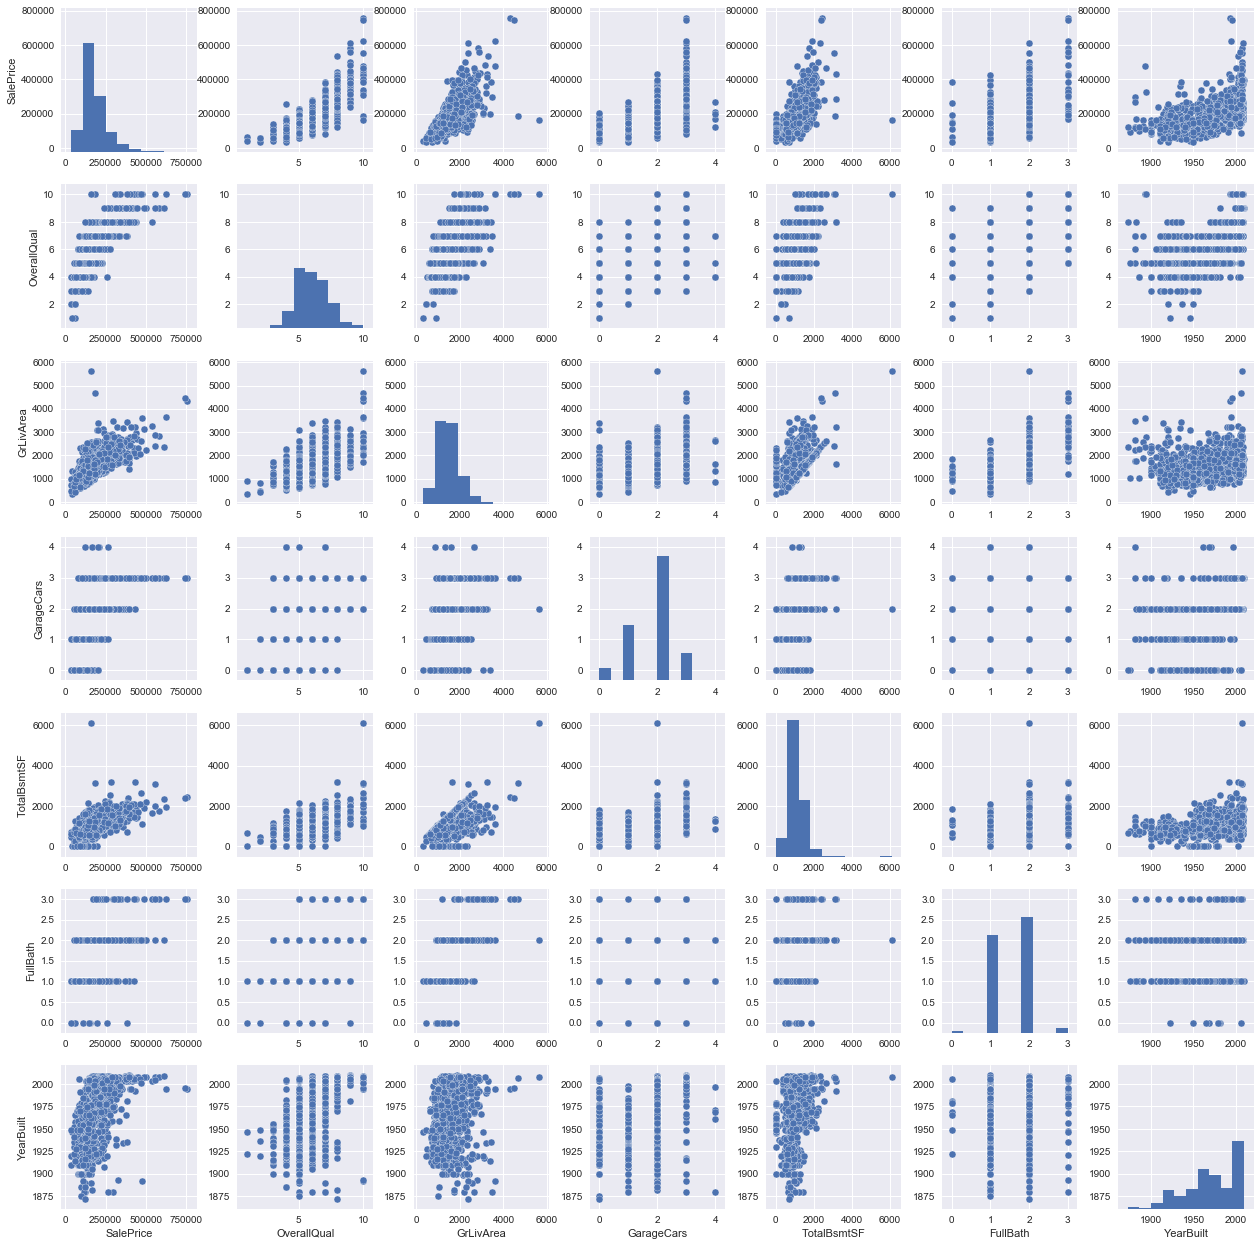

In [14]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
#8）sns，pairplot
plt.show();


In [15]:
df_train[cols].values.T

array([[208500, 181500, 223500, ..., 266500, 142125, 147500],
       [     7,      6,      7, ...,      7,      5,      5],
       [  1710,   1262,   1786, ...,   2340,   1078,   1256],
       ..., 
       [   856,   1262,    920, ...,   1152,   1078,   1256],
       [     2,      2,      2, ...,      2,      1,      1],
       [  2003,   1976,   2001, ...,   1941,   1950,   1965]], dtype=int64)

In [16]:
##4. Missing data



In [17]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
#9)count() 方法用于统计字符串里某个字符出现的次数,df_train.isnull()已经是被false和true替代的df如果不加isnull会忽略missingdata
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [18]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...
#10)查询是否存在空值df_train.isnull().sum().max()

0

In [19]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
#11)np.newaxis分别是在行或列上增加维度
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
#12）argsort():x中的元素从小到大排列，提取其对应的index(索引)，然后输出到y
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


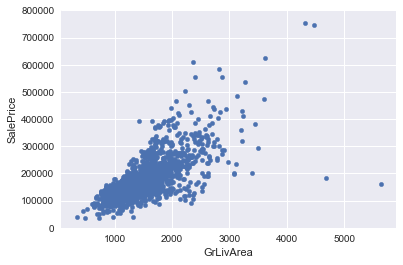

In [20]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [21]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [22]:
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

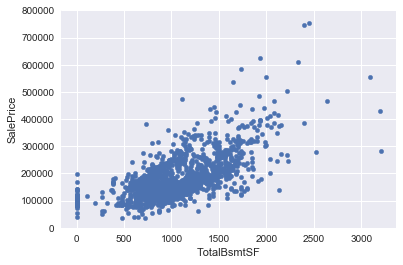

In [23]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [24]:
#5. Getting hard core
#In the search for normality



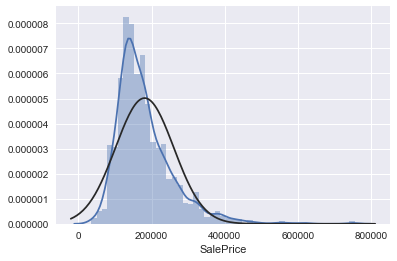

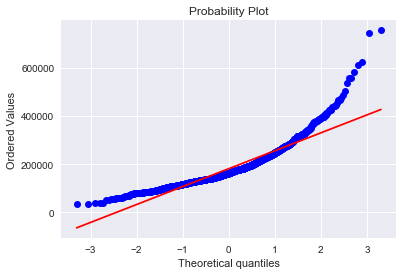

In [25]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
#13）stats.probplot绘制正态概率图

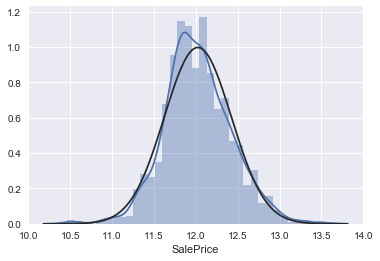

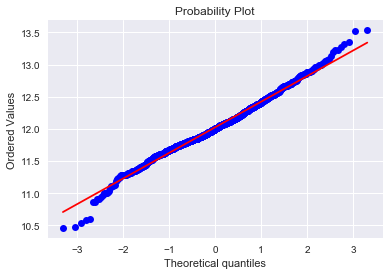

In [26]:
# in case of positive skewness, log transformations usually works well.
df_train['SalePrice'] = np.log(df_train['SalePrice'])
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

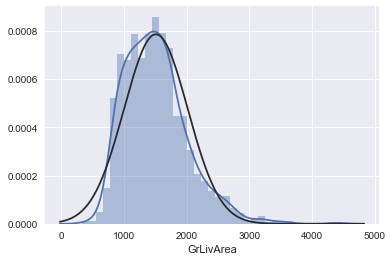

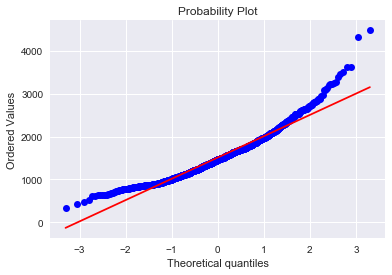

In [27]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

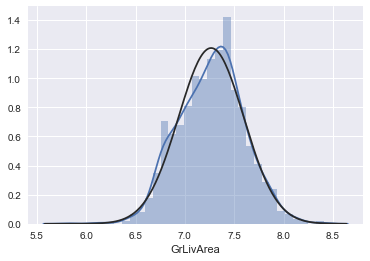

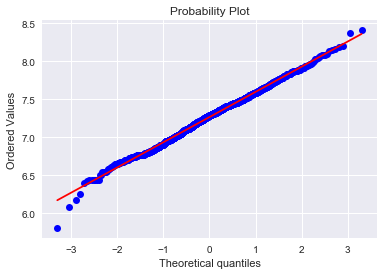

In [28]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

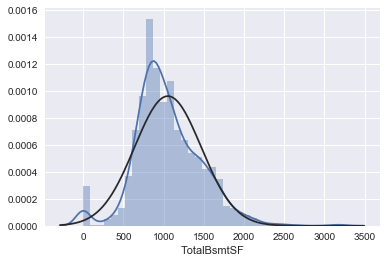

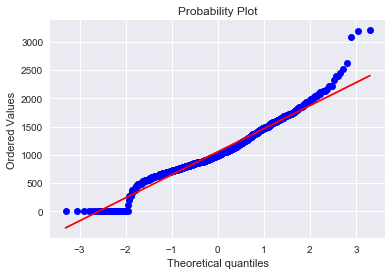

In [29]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

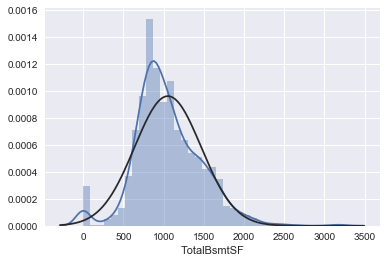

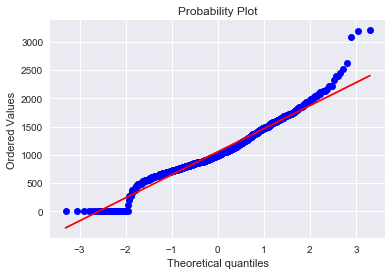

In [30]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [31]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [32]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

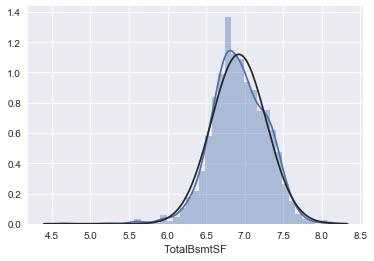

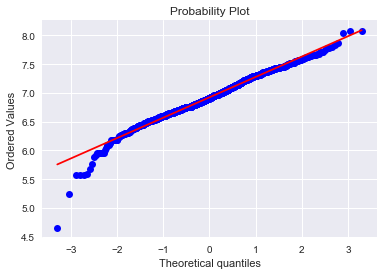

In [33]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [34]:
pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)

0       1457
1       1457
2       1457
3       1457
4       1457
5       1457
6       1457
7       1457
8       1457
9       1457
10      1457
11      1457
12      1457
13      1457
14      1457
15      1457
16      1457
17      1457
18      1457
19      1457
20      1457
21      1457
22      1457
23      1457
24      1457
25      1457
26      1457
27      1457
28      1457
29      1457
        ... 
1430    1457
1431    1457
1432    1457
1433    1457
1434    1457
1435    1457
1436    1457
1437    1457
1438    1457
1439    1457
1440    1457
1441    1457
1442    1457
1443    1457
1444    1457
1445    1457
1446    1457
1447    1457
1448    1457
1449    1457
1450    1457
1451    1457
1452    1457
1453    1457
1454    1457
1455    1457
1456    1457
1457    1457
1458    1457
1459    1457
Length: 1457, dtype: int64

In [35]:
df_train['HasBsmt'] 

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      0
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
1430    1
1431    1
1432    1
1433    1
1434    1
1435    1
1436    1
1437    1
1438    1
1439    1
1440    1
1441    1
1442    1
1443    1
1444    1
1445    1
1446    1
1447    1
1448    1
1449    1
1450    1
1451    1
1452    1
1453    1
1454    1
1455    1
1456    1
1457    1
1458    1
1459    1
Name: HasBsmt, Length: 1457, dtype: int64

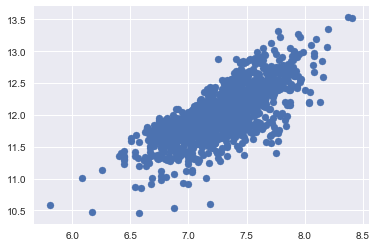

In [36]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);


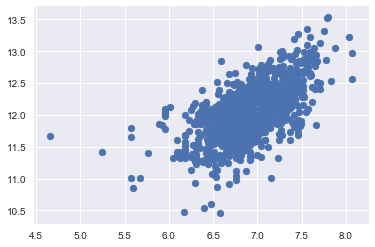

In [37]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

In [38]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)

In [39]:
from sklearn.model_selection import train_test_split,cross_val_score
y=df_train['SalePrice']



X=df_train.drop(['SalePrice'],axis=1)

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=13)

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
rfr=RandomForestRegressor(n_estimators=150)
print(cross_val_score(rfr,X,y,cv=5))
rfr.fit(X_train,y_train)
predicts_rfr=rfr.predict(X_test)
print('the r2_score is %s \tmean_absolute_error is %s \t the mean_squared_error is %s'%(r2_score(y_test,predicts_rfr),mean_absolute_error(y_test,predicts_rfr),mean_squared_error(y_test,predicts_rfr)))


[ 0.87212866  0.89455805  0.87884465  0.88707269  0.87673805]
the r2_score is 0.864585464624 	mean_absolute_error is 0.0979974136376 	 the mean_squared_error is 0.0203834503007


[ 0.76973094  0.86410716  0.82855214  0.81380468  0.8222682 ]
the r2_score is 0.790095156057 	mean_absolute_error is 0.136232933983 	 the mean_squared_error is 0.0315962015637


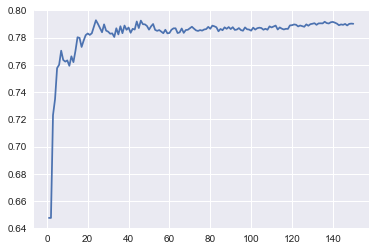

In [41]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor(n_estimators=150)
print(cross_val_score(abr,X,y,cv=5))
abr.fit(X_train,y_train)
predicts_abr=abr.predict(X_test)
print('the r2_score is %s \tmean_absolute_error is %s \t the mean_squared_error is %s'%(r2_score(y_test,predicts_abr),mean_absolute_error(y_test,predicts_abr),mean_squared_error(y_test,predicts_abr)))
plt.plot(range(1,151),[accuracy for accuracy in abr.staged_score(X_test,y_test)])
plt.show()

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   41.9s finished


Best score: 0.858
Best parameter set:
	plf__criterion:'mse'
	plf__max_depth:155
	plf__min_samples_leaf:3
	plf__min_samples_split:3


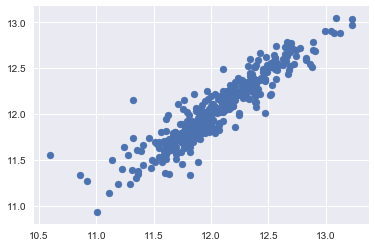

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
pipeline=Pipeline([
    ('plf',RandomForestRegressor())
])
parameters={
    #'plf__n_estimators':tuple(np.array(range(1,50))),
    'plf__criterion':('mse','mae'),
    'plf__max_depth':(150,155,160),
    'plf__min_samples_split':(2,3),
    'plf__min_samples_leaf':(1,2,3), 
    #'plf__bootstrap':(True,False),
}
grid_search=GridSearchCV(pipeline,parameters,n_jobs=-1,verbose=1,cv=3)
grid_search.fit(X_train,y_train)
print('Best score: %0.3f' %grid_search.best_score_)
print('Best parameter set:')
best_parameters=grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('\t%s:%r'%(param_name ,best_parameters[param_name]))
predict_grid=grid_search.predict(X_test)
plt.scatter(y_test,predict_grid)

plt.show()
